# CHAPTER 03. 평가
머신러닝 구성: 데이터 가공/변환, 모델 학습/예측, 평가(Evaluation) 프로세스로 구성  
성능 평가 지표(Evaluation Metric): 모델이 분류인지 회귀인지에 따라 여러 종류로 나뉨  

- 회귀: 대부분 실제값과 예측값의 오차 평균값에 기반  
  ex) 오차에 절댓값을 씌운 뒤 평균 오차를 구하거나 오차의 제곱값에 루트를 씌운 뒤, 평균 오차를 구하는 방법
      -> 기본적으로 예측 오차를 가지고 정규화 수준을 재가공하는 방법 (5장에서 다시 설명)
- 분류: 일반적으로는 실제 결과 데이터와 예측 결과 데이터가 얼마나 정확하고 오류가 적게 발생하는가에 기반
        단, 단순히 이러한 정확도만 가지고 판단할 경우 잘못된 평가 결과로 빠질 수 있음

해당 장에서는 분류에 사용되는 성능 평가 지표에 관해 학습  
특히, 0과 1로 결정값이 한정되는 이진 분류의 성능 평가 지표에 관해 집중적으로 살펴볼 예정  
0이냐 1이냐 혹은 긍정/부정을 판단하는 이진 분류에서는, 정확도보다는 다른 성능 평가 지표가 더 중요시되는 경우가 많음

- 분류의 성능 평가 지표
  - 정확도(Accuracy)
  - 오차행렬(Confusion Matrix)
  - 정밀도(Precision)
  - 재현율(Recall)
  - F1 스코어
  - ROC AUC
  
- 분류의 나눔
  - 이진 분류: 결정 클래스 값 종류 유형에 따라 긍정/부정과 같은 2개의 결괏값만을 가짐
  - 멀티 분류: 여러 개의 결정 클래스 값을 가지는 멀티 분류

분류의 성능 지표는 특히 이진 분류에서 더욱 중요하게 강조됨  


## 01. 정확도(Accuracy)
- 정확도: 실제 데이터에서 예측 데이터가 얼마나 같은지 판단하는 지표  
  $$ 정확도(Accuracy) = \frac{예측 결과가 동일한 데이터 수}{전체 예측 데이터 수} $$
 
정확도는 직관적으로 모델 예측 성능을 나타내는 평가 지표  
단, 이진 분류의 경우 데이터 구성에 따라 ML 모델 성능을 왜곡할 수 있어서 정확도 수치 하나로만 성능을 평가하지 않음  

**예시**
2장의 타이타닉 예제 수행 결과를 보면 정확도의 한계를 볼 수 있음  
ML 알고리즘을 적용한 후 예측 정확도 결과가 보통 80%대였지만, 탑승객이 남자인 경우보다 여자인 경우 생존 확률이 높았기 때문에 별다른 알고리즘 적용 없이 성별이 여자인 경우 무조건 생존, 남자인 경우 사망으로 예측 결과를 예측해도 비슷한 수치가 나올 수 있음  
-> 성별 조건 하나만ㅇ로 결정하는 수준 낮은 알고리즘도 높은 정확도를 나타내는 상황이 발생할 수 있음  

**추가 실습**
사이킷런의 BaseEstimator 클래스를 상속받아 아무런 학습을 하지 않고, 성별에 따라 생존자를 예측하는 단순한 Classifier를 생성  
(사이킷런은 BaseEstimator를 상속받으면 Customized 형태의 Estimator를 개발자가 생성할 수 있게 함)  
- MyDummyClassifier 클래스: 학습을 수행하는 fit() 메서드는 아무것도 수행하지 않고, 예측을 수행하는 predict() 메서드는 단순이 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측하는 매우 단순한 Classifier  

In [2]:
import pandas as pd
import numpy as np
from IPython.display import Image
import warnings 
warnings.filterwarnings('ignore')

In [8]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    # predict() 메서드는 단순히 Sex 피처가 1이면 0, 아니면 1로 예측
    def predict(self, X):
        pred = np.zeros( (X.shape[0],1) )
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1 
        return pred

In [4]:
## 생성된 MyDummyClassifier를 이용해 타이타닉 생존자 예측 수행

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

## Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

## 머신러닝에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

## Label Encoding 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

## 앞에서 실행한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [9]:
# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('data/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(['Survived'], axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 활용해서 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


단순한 알고리즘으로 예측하더라도 데이터 구성에 따라 정확도 결과는 약 78.77%로 꽤 높은 수치가 나올 수 있음  
-> 정확도를 평가 지표로 사용할 때는 신중할 필요가 있음  

특히, 불균형한(imbalanced) 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가 지표가 아님  
ex) 100개의 데이터가 있고 이 중 90개의 데이터 레이블이 0, 단 10개의 데이터 레이블이 1이라고 한다면 무조건 0으로 예측 결과를 반환하는 ML 모델의 경우라도 정확도가 90%가 됨  

**MNIST 데이터 세트로 살펴보기**
MNIST 데이터 세트를 변환해 불균형한 데이터 세트로 만든 뒤, 정확도 지표 적용 시 발생하는 문제 살펴보기  
MNIST 데이터 세트는 0부터 9까지 숫자 이미지 픽셀 정보를 가지고 있으며, 숫자 Digit를 예측하는데 사용됨  
사이킷런은 load_digits() API를 통해 MNIST 데이터 세트를 제공  

원래 MNIST 데이터 세트는 레이블 값이 0부터 9까지 있는 멀티 레이블 분류를 위한 것이나, 이를 레이블 값이 7인 것만 True, 나머지 값은 모두 False로 변환해 이진 분류 문제로 바꾸어 실습  
-> 전체 데이터의 10%만 True, 나머지 90%는 False인 불균형한 데이터 세트로 변형  

- MNIST 데이터셋을 multi classification에서 binary classification으로 변경
불균형한 데이터 세트에 모든 데이터를 False로, 즉 0으로 예측하는 classifier를 이용해 정확도를 측정하면 약 90%에 가까운 예측 정확도를 나타냄  
아무것도 하지 않고 무조건 특정한 결과로 찍어도 데이터 분포도가 균일하지 않은 경우, 높은 수치가 나타날 수 있음  

ex) step 1. 불균형한 데이터 세트와 Dummy Classifier 생성

In [10]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, x, y):
        pass
    
    # 입력값으로 들어오는 X 데이터 세트 크기만큼 모두 0값으로 만들어 변환
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True고, 이를 astype(int)로 1로 변환, 7번이 아니면 False고 0으로 변환
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

step 2. 불균형한 데이터로 생성한 y_test 데이터 분포도를 확인하고 MyFakeClassifier를 이용해 예측과 평가 수행

In [11]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


단순히 predict() 결과를 np.zero()로 모두 0값으로 반환함에도 불구하고 450개의 테스트 데이터 세트에 수행한 예측 정확도는 90%  
단지 모든 것을 0으로만 예측해도 MyFakeClassifier의 정확도가 90%로 유수의 ML 알고리즘과 비슷한 결과를 냄  

-> 정확도 평가 지표는 불균형한 레이블 데이터 세트에서 성능 세트로 사용해서는 안 됨  
-> 정확도를 분류 평가 지표로 사용 시, 한계를 극복하기 위해 여러 가지 분류 지표를 함께 적용

## 02. 오차 행렬
오차 행렬(confusion matrix, 혼동행렬): 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리는지(confused) 보여주는 지표  
-> 이진 분류의 예측 오류가 얼마인지, 어떤 유형의 예측 오류가 발생하는지를 나타내는 지표  

오차 행렬은 4분명 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떠한 유형을 가지고 매핑되는지를 나타냄  
4분면의 왼쪽, 오른쪽을 예측된 클래스 값 기준으로 Negative와 Positive로 분류하고 4분면의 위, 아래를 실제 클래스 값 기준으로 Negative와 Positive로 분류하면 예측 클래스와 실제 클래스 값 유형에 따라 결정되는 TN, FP, FN, TP 형태로 오차 행렬의 4분면이 만들어짐  

True/False: 예측값과 실제값이 같음/틀림, Negative/Positive: 예측 결괏값이 부정(0)/긍정(1)  
- TN: 예측값을 Negative 값 0으로 예측, 실제 값도 Negative 값 0
- FP: 예측값을 Positive 값 1로 예측, 실제 값은 Negative 값 0
- FN: 예측값을 Negative 값 0으로 예측, 실제 값은 Positive 값 1
- TP: 예측값을 Positive 값 1로 예측, 실제 값도 Positive 값 1

사이킷런은 오차 행렬을 구하기 위해 confusion_matrix() API를 제공  
정확도 예제에서 다룬 MyFakeClassifier의 예측 성능 지표를 오차 행렬로 표현해보기  
(예측 결과인 fakepred와 실제 결과인 y_test를 confusion_matrix()의 인자로 입력해 오차 행렬을 confusion_matrix()를 이용해 배열 형태로 출력)

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

출력된 오차 행렬은 ndarray 형태  
이진 분류의 TN, FP, FN, FP는 상단 도표와 동일한 위치를 가지고 array에서 가져올 수 있음  
-> TN은 array[0,0]으로 405, FP는 array[0,1]로 0, FN은 array[1,0]으로 45, TP는 array[1,1]로 0에 해당  

앞 절의 MyFakeClassifier는 load_digits()에서 target == 7인지 아닌지에 따라 클래스 값을 Ture/False 이진 분류로 변경한 데이터 세트를 사용해서 무조건 Negative로 예측하는 Classifier였고 테스트 데이터 세트의 클래스 값 분포는 0이 405건, 1이 45건  
- TN: 전체 450건 데이터 중, 무조건 Negative 0으로 예측해서 True가 된 결과 405건
- FP: Positive 1로 예측한 건수가 없으므로 0건
- FN: Positive 1인 건수 45건을 Negative로 예측해서 False가 된 결과 45건
- TP: Positive 1로 예측한 건수가 없으므로 0건

TP, TN, FP, TN 값은 Classifier 성능의 여러 면모를 판단할 수 있는 기반 정보를 제공  
이 값을 조합해 Classifier 성능을 측정할 수 있는 주요 지표인 정확도(Accuracy), 정밀도(Precision), 재현율(Recall) 값을 알 수 있음  

cf) 정확도는 예측값과 실제 값이 얼마나 동일한가에 관한 비율만으로 결정  
    -> 오차 행렬에서 True에 해당하는 값인 TN과 TP에 좌우됨
- 정확도 = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수 = $\frac{TN + TP}{TN + FP + FN + TP}$  

일반적으로 불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 많은 데이터 중 중점적으로 찾아야 하는 매우 적은 수의 결괏값에 Positive를 설정해 1값을 부여, 그렇지 않은 경우는 Negative로 0값을 부여하는 경우가 많음  
ex) 사기 행위 예측 모델: 사기 행위 Positive 양성, 1 / 정상 행위 Negative 음성, 0  
    암 검진 예측 모델: 암이 양성일 경우 Positive 양성, 1 / 암이 음성일 경우 Negative 음성, 0  
    
불균형한 이진 분류 데이터 세트에서는 Positive 데이터 건수가 매우 작기 때문에 데이터에 기반한 ML 알고리즘은 Positive보다는 Negative로 예측 정확도가 높아지는 경향 발생  
10,000건의 데이터 세트에서 9,900건이 Negative고 100건이 Positive라면 Negative로 예측하는 경향이 더 강해 TN은 매우 커지고 TP는 매우 작아짐  
Negative로 예측할 때, 정확도가 높기 때문에 FN(Negative로 예측할 때 틀린 데이터 수)이 매우 작고, Positive로 예측하는 경우가 작기 때문에 FP 역시 작아짐  
-> 정확도 지표는 비대칭한 데이터 세트에서 Positive에 관한 예측 정확도를 판단하지 못한 채 Negative에 관한 예측 정확도만으로도 분류의 정확도가 매우 높게 나타나는 수치적인 판단 오류를 일으킴  

**정리**
정확도는 분류(Classification) 모델의 성능을 측정할 수 있는 한 가지 요소  

## 03. 정밀도와 재현율
정밀도&재현율: Positive 데이터 세트의 예측 성능에 조금 더 초점을 맞춘 평가 지표  
앞서 만든 MyFakeClassifier는 Positive로 예측한 TP 값이 하나도 없기 때문에, 정밀도와 재현율 값이 모두 0  

- 정밀도 = $\frac{TP}{FP + TP}$  
- 재현율 = $\frac{TP}{FN + TP}$
<br>

- **정밀도: 예측값을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율**  
  - 공식의 분모인 FP + TP: 예측을 Positive로 한 모든 데이터 건수 / 분자인 TP: 예측과 실제 값이 Positive로 일치한 데이터 건수
  - Positive 예측 성능을 더욱 정밀히 측정하기 위한 평가 지표로 '양성 예측도'라고도 불림  
<br>

- **재현율: 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율**
  - 공식의 분모인 FN + TP: 실제 값이 Positive인 모든 데이터 건수 / 분자인 TP: 예측과 실제 값이 Positive로 일치한 데이터 건수
  - 민감도(Sensitivity) 또는 TPR(True Positive Rate)라고도 불림
<br>

정밀도와 재현율 지표 중, 이진 분류 모델의 업무 특성에 따라 특정 평가 지표가 더 중요한 지표로 간주될 수 있음
- 재현율이 중요 지표인 경우: 실제 Positive 양성 데이터를 Negative로 잘못 판단할 시, 업무에 큰 영향이 발생하는 경우
- 정밀도가 중요 지표인 경우: 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단 시, 업무상 큰 영향이 발생하는 경우
<br>

**정리**  
재현율과 정밀도 모두 TP를 높이는 데 초점  
재현율은 FN(실제 Positive, 예측 Negative)를 낮추는 데, 정밀도는 FP를 낮추는 데 초점  
-> 서로 보완적인 지표로 분류의 성능을 평가하는 데 적용되며 두 수치 모두 높은 것이 가장 좋은 성능  
   (둘 중 어느 한 평가 지표만 매우 높고, 다른 수치는 매우 낮은 경우는 바람직하지 않음)  
   
ex) 타이타닉 예제  
오차 행렬 및 정밀도, 재현율을 모두 구해 예측 성능 평가하기  
사이킷런은 정밀도 계산을 위해 precision_score()를, 재현율 계산을 위해 recall_score()를 API로 제공  

In [21]:
# 평가 간편히 적용하기: coufusion, matrix, accuracy, precision, recall 등 평가를 한 번에 호출하는 get_clf_eval() 함수 만들기
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도 : {:.4f}\n정밀도 : {:.4f}\n재현율 : {:.4f}'.format(accuracy, precision, recall))

로지스틱 회귀 기반으로 타이타닉 생존자를 예측하고 confusion matrix, accuracy, precision, recall 평가 수행

In [22]:
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('data/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492
정밀도 : 0.7742
재현율 : 0.7869


정밀도(Precision)에 비해 재현율(Recall)이 낮게 나옴

### 1. 정밀도/재현율 트레이드오프
분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있음  
단, 정밀도와 재현율은 상호 보완적인 평가 지표로 한쪽을 강제로 높이면 다른 하나의 수치가 떨어지기 쉬움  

사이킷런의 분류 알고리즘은 예측 데이터가 특정 레이블(Label, 결정 클래스 값)에 속하는지 계산하기 위해, 먼저 개별 레이블별로 결정 확률을 구함 -> 예측 확률이 큰 레이블값으로 예측  

사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba()를 제공  
predict_proba(): 학습 완료된 사이킷런 Classifier 객체에서 호출 가능하며 테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환 (predict() 메서드와 유사하지만 반환 결과가 예측 결과 클래스 값이 아닌 예측 확률 결과)  

이진 분류에서 predict_proba()를 수행해 반환되는 ndarray는 첫 번째 칼럼이 클래스 값 0에 대한 예측 확률, 두 번째 칼럼이 클래스 값 1에 대한 예측 확률  

In [23]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 shape: {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array와 예측 결괏값 aaray를 병합(concetenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba() 결과 shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.4623509  0.5376491 ]
 [0.87875882 0.12124118]
 [0.87717457 0.12282543]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.4623509  0.5376491  1.        ]
 [0.87875882 0.12124118 0.        ]
 [0.87717457 0.12282543 0.        ]]


반환 결과인 ndarray는 0과 1에 대한 확률을 나타내므로 첫 번째 칼럼 값과 두 번째 칼럼 값을 더하면 1이 됨  
맨 마지막 줄의 predict() 메서드의 결과, 비교에서도 나타나듯이 두 개의 칼럼 중에서 더 큰 확률 값으로 predict() 메서드가 최종 예측  

predict() 메서드는 predict_proba() 메서드에 기반해 생성된 API  
predict()는 predict_proba() 호출 결과로 반환된 배열에서 분류 결정 임계값보다 큰 값이 들어 있는 칼럼의 위치를 받아서 최종적으로 예측 클래스를 결정하는 API  

**코드로 구현해보기**
threshold 변수를 특정 값으로 설정하고 Binarizer 클래스를 객체로 생성  
-> 생성된 Binarizer 객체의 fit_transform() 메서드를 이용해 넘파이 ndarray를 입력  
-> 입력된 ndarray 값이 지정된 threshold보다 같거나 작으면 0 값으로, 크면 1 값으로 변환해 반환

In [24]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold 값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


입력된 X 데이터 세트에서 Binarizer의 threshold 값이 1.1보다 같거나 작으면 0, 크면 1로 변환됨을 알 수 있음  

Binarizer를 이용해 사이킷런 predict()의 의사(pseudo) 코드 만들기

In [25]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값. 분류 결정 임계값임.
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492
정밀도 : 0.7742
재현율 : 0.7869


위 의사 코드로 계산된 평가 지표는 앞 예제의 타이타닉 데이터로 학습된 로지스틱 회귀 Classifier 객체에서 호출된 predict()로 계산된 지표 값과 정확히 일치  
-> predict()가 predict_proba()에 기반함을 알 수 있음

In [26]:
# 추가. 분류 결정 입계값을 0.5에서 0.4로 낮춰보기
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값. 분류 결정 임계값임. (0.5 -> 0.4)
custom_threshold = 0.4

# predict_proba() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[98 20]
 [10 51]]
정확도 : 0.8324
정밀도 : 0.7183
재현율 : 0.8361


임계값을 낮추니 재현율 수치가 올라가고 정밀도가 떨어짐  
-> 분류 결정 임계값은 Positive 예측값을 결정하는 확률의 기준  
-> 확률을 0.5가 아닌 0.4부터 Positive로 예측을 너그럽게 하여 임계값이 낮아질수록 True 값이 많아짐  

Positive 예측값이 많아지면 상대적으로 재현율 값이 높아짐  
-> 양성 예측을 많이 하다보니 실제 양성을 음성으로 예측하는 획수가 상대적으로 줄기 때문  

<br>
임계값을 0.4부터 0.6까지 0.05씩 증가시키며 평가 지표 조사하기

In [27]:
# 테스트를 수행할 모든 임계값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds list 객체 내의 값을 iteration 하면서 평가 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임계값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)


임계값:  0.4
오차행렬
[[98 20]
 [10 51]]
정확도 : 0.8324
정밀도 : 0.7183
재현율 : 0.8361

임계값:  0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 : 0.8492
정밀도 : 0.7656
재현율 : 0.8033

임계값:  0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492
정밀도 : 0.7742
재현율 : 0.7869

임계값:  0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도 : 0.8659
정밀도 : 0.8364
재현율 : 0.7541

임계값:  0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 : 0.8771
정밀도 : 0.8824
재현율 : 0.7377


지금까지 임계값 변화에 따른 평가 지표 값을 알아보는 코드를 작성  
사이킷런은 이와 유사한 precision_recall_curve() API를 제공  
precision_recall_curve() API의 입력 파라미터와 반환 값은 아래와 같음

**입력 파라미터**  
- y_true: 실제 클래스값 배열(배열 크기 = [데이터 건수]
- probas_pred: Positive 칼럼의 예측 확률 배열(배열 크기 = [데이터 건수]  

**반환값**  
- 정밀도: 임계값별 정밀도 값을 배열로 반환
- 재현율: 임계값별 재현율 값을 배열로 반환  

추가. precision_recall_curve()로 타이타닉 예측 모델의 임계값별 정밀도와 재현율 구하기

In [29]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[ : , 1]

# 실제값 데이터 세트와 레이블 값이 1일 때 예측확률을 precision_recall_curve의 인자로 반환
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임계값 배열의 shape: ', thresholds.shape)

# 반환된 임계값 배열 로우가 147건 이므로 샘플로 10건만 추출하되, 임계값을 15 Step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개: ', thr_index)
print('샘플용 10개의 임계값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도 : ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율 : ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임계값 배열의 shape:  (143,)
샘플 추출을 위한 임계값 배열의 index 10개:  [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값:  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도 :  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율 :  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


추출된 임계값 샘플 10개에 해당하는 정밀도 값과 재현율 값을 살펴보면 임계값이 증가할수록 정밀도값은 동시에 높아지나 재현율 값은 낮아짐    
precision_recall_curve() API는 정밀도와 재현율의 임계값에 따른 값 변화를 곡선 형태의 그래프로 시각화하는 데 이용할 수 있음

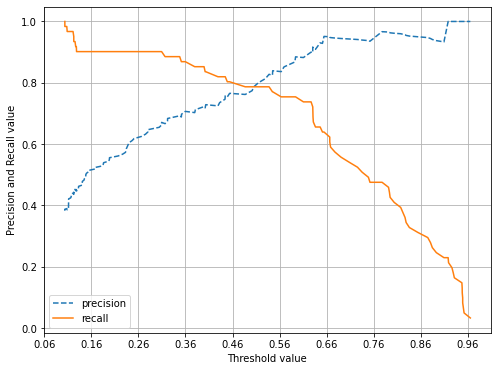

In [30]:
# API 이용하여 정밀도, 재현율 곡선 시각화하기
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # x축을 threshold 값, y축을 정밀도, 재현율로 그리기
    plt.figure(figsize=(8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0: thresholds_boundary], linestyle= '--', label='precision')
    plt.plot(thresholds, recalls[0: thresholds_boundary], label='recall')
    
    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

(정밀도는 점섬, 재현율은 실선으로 표현)  
- 임계값이 낮을수록 많은 수의 양성 예측으로 재현율 값이 극도로 높아지고 정밀도 값이 극도로 낮아짐  
- 임계값을 증가시킬수록 재현율 값이 낮아지고 정밀도 값이 높아짐

### 2. 정밀도와 재현율의 맹점
임계값의 변경은 정밀도와 재현율을 상호 보완할 수 있는 수준에서 해야 함  

- 정밀도 또는 재현율 평가 지표 수치 중 하나를 극단적으로 높이는 방법이나 잘못된 방법
  - 정밀도가 100%가 되는 방법
    - 확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측
    - 정밀도 = TP / (TP + FP)
    - 전체 환자 1,000명 중 확실한 Positive 징후만 가진 암환자가 1명이라고 하면, 한 명만 Positive로 예측하더라도 정밀도는 1/(1+0) = 100%가 됨
  - 재현율이 100%가 되는 방법
    - 모든 환자를 Positive로 예측
    - 재현율 = TP / (TP + FN)
    - 전체 환자 1,000명을 다 Positive로 예측하면 실제 양성인 사람이 30명 정도여도 TN이 수치에 포함되지 않고 FN은 0이므로 정밀도는 1/(1+0)으로 100%가 됨

## 04. F1 스코어
F1 스코어: 정밀도와 재현율을 결합한 지표, 정밀도와 재현율이 어느 한 쪽으로 치우치지 않을 때 상대적으로 높은 값을 가짐  

F1 = $\frac{2}{{1}{recall}+{1}{precision}}$ = 2 x $\frac{precision x recall}{precision + recall}$  

만일 A 예측 모델의 정밀도가 0.9, 재현율이 0.1로 극단적인 차이가 나고, B 예측 모델은 정밀도가 0.5, 재현율이 0.5로 큰 차이가 없다면 A 예측 모델의 F1 스코어는 0.18이고, B 예측 모델의 F1 스콩는 0.5로 B 모델이 A 모델에 비해 매우 우수한 F1 스코어를 가지게 됨  

사이킷런은 F1 스코어를 구하기 위해 f1_score()라는 API를 제공  

In [34]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {:.4f}'.format(f1))

F1 스코어: 0.7805


In [36]:
# 추가. 타이타닉 생존자 예측에서 임계값을 변화시키며 F1 스코어를 포함한 평가 지표 구하기
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    # F1 score print 추가
    print('\n정확도: {:.4f}\n정밀도: {:.4f}\n재현율: {:.4f}\nF1: {:.4f}'.format(accuracy, precision, recall, f1))
    
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)


임계값:  0.4
오차행렬
[[98 20]
 [10 51]]

정확도: 0.8324
정밀도: 0.7183
재현율: 0.8361
F1: 0.7727

임계값:  0.45
오차행렬
[[103  15]
 [ 12  49]]

정확도: 0.8492
정밀도: 0.7656
재현율: 0.8033
F1: 0.7840

임계값:  0.5
오차행렬
[[104  14]
 [ 13  48]]

정확도: 0.8492
정밀도: 0.7742
재현율: 0.7869
F1: 0.7805

임계값:  0.55
오차행렬
[[109   9]
 [ 15  46]]

정확도: 0.8659
정밀도: 0.8364
재현율: 0.7541
F1: 0.7931

임계값:  0.6
오차행렬
[[112   6]
 [ 16  45]]

정확도: 0.8771
정밀도: 0.8824
재현율: 0.7377
F1: 0.8036


## 05. ROC 곡선과 AUC
- ROC 곡선(Receiver Operation Characteristic Curve)
  - FPR(Fales Positive Rate)이 변할 때, TPR(True Positive Rate)이 어떻게 변하는지 나타내는 곡선
  - FPR을 X 축으로, TPR을 Y 축으로 잡으면 FPR 변화에 따른 TPR 변화가 곡선 형태로 나타남
  
- TPR(True Positive Rate): 재현율(Recall)이자 민감도(Sensitivity) => TPR = TP / (FN + TP)  
  - 실제값 Positive가 정확히 예측돼야 하는 수준(질병 보유자를 질병 보유했다고 양성 판정)
- TNR(True Negative Rate)이자 특이성(Specificity) => TNR = TN / (TN + FP)  

TNR인 특이성은 아래 공식으로 구할 수 있음  
**FPR = FP / (FP + TN) = 1 - TNR = 1 - 특이성**

ROC 곡선은 FPR을 0부터 1까지 변경하면서 TPR의 변화 값을 구함  

사이킷런은 ROC 곡선을 구하기 위해 roc_curve() API를 제공  
- 입력 파라미터
  - y_true: 실제 클래스 값 array (array shape = [데이터 건수]
  - y_score: predict_proba()의 반환값 array에서 Positive 칼럼의 예측 확률이 보통 사용됨 (array.shape = [n_samples]  

- 반환 값
  - fpr: fpr 값을 array로 반환
  - tpr: tpr 값을 array로 반환
  - threshold: threshold 값 array

In [38]:
# roc_curve() API를 이용해 타이타닉 생존자 예측 모델의 FPR, TPR, 임계값 구하기
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때 예측 확률 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열 로우가 47건이므로 샘플로 10건만 추출하되 임계값을 5step으로 추출
# threshold[0]은 max(예측확률) + 1로 임의 설정, 이를 제외하기 위해 np.arrange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임계값 배열의 index 10개: ', thr_index)
print('샘플용 10개의 임계값: ', np.round(thresholds[thr_index], 2))

# 5 step으로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임계값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임계값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index 10개:  [ 1  6 11 16 21 26 31 36 41 46 51]
샘플용 10개의 임계값:  [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임계값별 FPR:  [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임계값별 TPR:  [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


결과를 살펴보면 임계깞이 1에 가까운 값에서 점점 작아지며 FPR이 점점 커짐  
FPR이 조금씩 커질 때 TPR은 가파르게 커짐

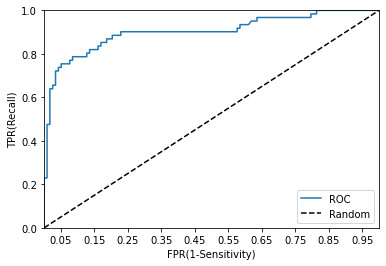

In [39]:
# ROC 곡선 시각화
def roc_curve_plot(y_test, pred_proba_c1):
    #임계값에 따른 FPR, TPR 값을반환 받음
    fprs, tprs, thresholds  = roc_curve(y_test, pred_proba_c1)
    # ROC곡선을 그래프로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    # FPR X축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:, 1])

일반적으로 ROC 곡선 자체는 FPR과 TPR의 변화값을 보는 데 이용  
분류의 성능 지표로는 ROC 곡선 면적에 기반한 AUC 값으로 결정   
- AUC(Area Under Curve): 곡선 밑의 면적 값으로 1에 가까울 수록 좋은 수치  
  AUC 수치가 커지려면 FPR이 작은 사태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건  
  가운데 대각선 직선은 랜덤 수준(동전 던지기 수준) 이진 분류 AUC 값으로 0.5  
  -> 보통의 분류는 0.5 이상의 AUC 값을 가짐

In [41]:
from sklearn.metrics import roc_auc_score

pred = lr_clf.predict(X_test)
roc_score = roc_auc_score(y_test, pred)
print('ROC AUC 값 : {:.4f}'.format(roc_score))

ROC AUC 값 : 0.8341


## 06. 피마 인디언 당뇨병 예측

피마 인디언 당뇨병 데이터 세트 구성  
- Pregnancies: 임신횟수  
- Glucose: 포도당 부하 검사 수치  
- BloodPressure: 혈압  
- SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값  
- Insulin: 혈청 인슐린  
- BMI: 체질량 지수  
- DiabetesPedigreeFunction : 당뇨 내력 가중치 값  
- Age: 나이   
- Outcome: 당뇨여부(0 또는 1)  

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [44]:
# 데이터 불러오기
diabetes_data = pd.read_csv('data/pima-indians/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


전체 768개의 데이터 중, Negative 값 0이 500개, Positive 값 1이 268개

In [47]:
# feature 타입과 Null 개수 세어보기
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Null 값은 없으며 피처 타입은 모두 숫자형  

로지스틱 회귀를 이용해 예측 모델 생성하기

In [53]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y 추출
# 맨 끝이 Outcome 칼럼으로 레이블 값, 칼럼 위치 -1을 이용해 추출
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[88 12]
 [23 31]]

정확도: 0.7727
정밀도: 0.7209
재현율: 0.5741
F1: 0.6392


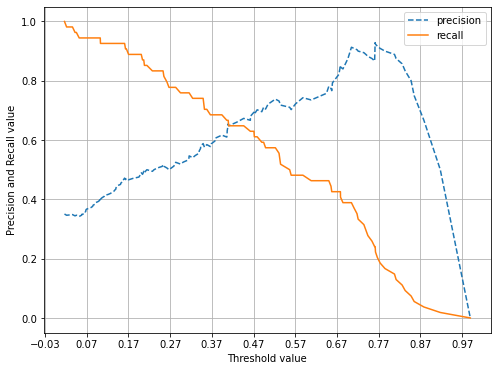

In [54]:
# 임계값별로 정밀도 - 재현율 출력
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba)

재현율 곡선을 보면 임계값을 0.42 정도로 낮추면 정밀도와 재현율이 어느 정도 균형을 맞출 것  
그러나, 두 지표 모두 0.7이 되지 않는 수치  
임계값을 인위 조작하기 전에 다시 데이터 점검해보기

In [56]:
# 원본 데이터 DataFrane describe() 메서드로 피처 값의 분포도 살피기
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


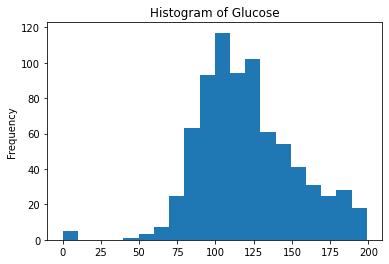

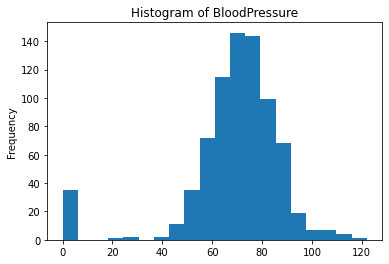

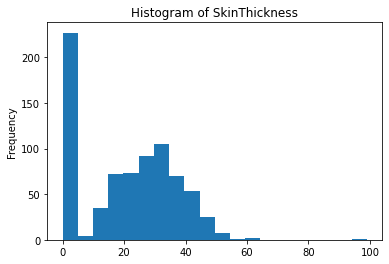

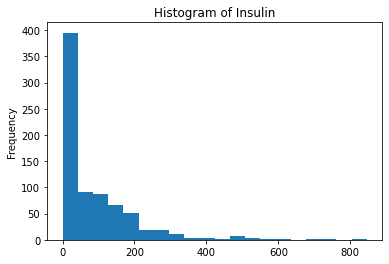

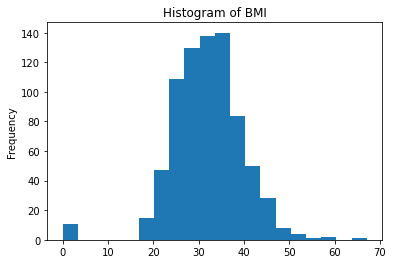

In [59]:
# min() 값이 0으로 된 피처에 대해 0 값의 건수 및 전체 데이터 건수 대비 몇 퍼센트의 비율로 존재하는지 확인해보기
feature_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

def hist_plot(df):
    for col in feature_list:
        df[col].plot(kind='hist', bins=20).set_title('Histogram of '+col)
        plt.show()

hist_plot(diabetes_data)

SkinThickness와 Insulin의 0 값은 전체의 29.56%, 48.7%로 많은 수준  
일괄 삭제 대신 위 피처의 0 값을 평균값으로 대체

In [63]:
# 위 컬럼들에 대한 0 값의 비율 확인
zero_count = []
zero_percent = []
for col in feature_list:
    zero_num = diabetes_data[diabetes_data[col]==0].shape[0]
    zero_count.append(zero_num)
    zero_percent.append(np.round(zero_num/diabetes_data.shape[0]*100,2))

zero = pd.DataFrame([zero_count, zero_percent], columns=feature_list, index=['count', 'percent']).T
zero

,count,percent
Glucose,5.0,0.65
BloodPressure,35.0,4.56
SkinThickness,227.0,29.56
Insulin,374.0,48.70
BMI,11.0,1.43


In [65]:
# zero_features 리스트 내부 저장된 개별 피처의 0 값을 평균값으로 대체
diabetes_data[feature_list] = diabetes_data[feature_list].replace(0, np.nan)

# 위 5개 feature 에 대해 0값을 평균 값으로 대체
mean_features = diabetes_data[feature_list].mean()
diabetes_data[feature_list] = diabetes_data[feature_list].replace(np.nan, mean_features)

In [66]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# StandardScaler 클래스를 상용하여 데이터 세트에 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=156, stratify = y)

# 로지스틱 회귀로 학습, 예측, 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train,  y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[89 11]
 [21 33]]

정확도: 0.7922
정밀도: 0.7500
재현율: 0.6111
F1: 0.6735


데이터 변환과 스케일링으로 성능 수치가 일정 수준 개선  
하지만, 여전히 재현율 수치 개선이 필요함 -> 분류 결정 임계값을 변화시키면서 재현율 값의 성능 수치 개선 정도를 확인하기

In [68]:
# 임계값을 0.3에서 0.5까지 0.03씩 변화시키면서 재현율과 다른 평가 지표의 값 변화를 출력
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)


임계값:  0.3
오차행렬
[[68 32]
 [10 44]]

정확도: 0.7273
정밀도: 0.5789
재현율: 0.8148
F1: 0.6769

임계값:  0.33
오차행렬
[[74 26]
 [11 43]]

정확도: 0.7597
정밀도: 0.6232
재현율: 0.7963
F1: 0.6992

임계값:  0.36
오차행렬
[[75 25]
 [13 41]]

정확도: 0.7532
정밀도: 0.6212
재현율: 0.7593
F1: 0.6833

임계값:  0.39
오차행렬
[[82 18]
 [16 38]]

정확도: 0.7792
정밀도: 0.6786
재현율: 0.7037
F1: 0.6909

임계값:  0.42
오차행렬
[[85 15]
 [18 36]]

정확도: 0.7857
정밀도: 0.7059
재현율: 0.6667
F1: 0.6857

임계값:  0.45
오차행렬
[[86 14]
 [19 35]]

정확도: 0.7857
정밀도: 0.7143
재현율: 0.6481
F1: 0.6796

임계값:  0.48
오차행렬
[[88 12]
 [20 34]]

정확도: 0.7922
정밀도: 0.7391
재현율: 0.6296
F1: 0.6800

임계값:  0.5
오차행렬
[[89 11]
 [21 33]]

정확도: 0.7922
정밀도: 0.7500
재현율: 0.6111
F1: 0.6735


- 0.33: 정확도와 정밀도를 희생하고 재현율을 높이는 데 가장 좋은 임계값  
- 0.48: 전체적인 성능 평가 지표를 유지하며 재현율을 약간 향상시키는 좋은 임계값  

앞서 학습된 로지스틱 회귀 모델을 이용해 임계값을 0.48로 낮춘 상태에서 다시 예측하기

In [70]:
# 임계값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 predict_proba() 예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환하기
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048)

오차행렬
[[88 12]
 [20 34]]

정확도: 0.7922
정밀도: 0.7391
재현율: 0.6296
F1: 0.6800


## 07. 정리

- **지금까지 살펴본 것**
  - 분류에 사용되는 정확도, 오차 행렬, 정밀도, 재현율, F1 스코어, ROC-AUC
  - 이진 분류 레이블 값이 불균형하게 분포될 경우, 정확도만으로 머신러닝 모델의 예측 성능을 평가할 수 없음
  
- **오차 행렬**
  - Negative와 Positive 값을 가지는 실제 클래스 값과 예측 클래스 값이 True와 False에 따라 TN, FP, FN, TP로 매핑되는 4분면 행렬을 기반으로 예측 성능 평가  
  - 정확도, 정밀도, 재현율 수치는 위 4가지 값을 다양하게 결합하여 만들어짐
  - 정확도, 정밀도, 재현율 수치를 통해 분류 모델 예측 성능 오류가 어떤 모양으로 발생하는지 확인 가능

- **정밀도(Precision)와 재현율(Recall)**
  - Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 지표
  - 재현율이 더 중요한 지표인 경우: 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단할 경우 업무상 큰 영향이 발생할 때
  - 재현율이 특별히 강조돼야 할 경우 분류의 결정 임계값(Threshold)을 조정해 정밀도 또는 재현율 수치 높이기
  
- **F1 스코어**
  - 정밀도와 재현율을 결합한 평가 지표
  - 정밀도와 재현율이 어느 한쪽으로 치우치지 않을 때 높은 지표값을 가짐
  - ROC_AUC는 일반적으로 이진 분류의 성능 평가를 위해 가장 많이 사용되는 지표
  - AUC(Area Under Curve) 값은 ROC 곡선 밑의 면적을 구한 것(일반적으로 1에 가까울수록 좋은 수치)